##* Design MLP with 2 hidden layers (Input Layer - 2 hidden Layer - Output layer) to classify objects (fashionMNIST) and digits (MNIST).
##* Design regularization approaches, and analyze drop/boost in performance of your model. Report results with atleast 2 regularization variants (droput, L1 penalty, L2, L1+L2, Normalization, Noise)

#* tfv5097@psu.edu :Thejasvi Velaga

In [129]:
# baseline cnn model for mnist
import os
import numpy as np
import time
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
seed=757493755
np.random.seed(seed)
tf.random.set_seed(seed)
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [29]:
# Constants 
size_input = 784
size_hidden = [128,64]
size_output = 10
number_of_train_examples = 7000 #60000
number_of_test_examples = 1500   #10000

## Load Dataset Function

In [30]:
#To load the data set for mist and fashion mnist
def load_dataset():
	# load dataset for mnist
	(trainX_mnist, trainY_mnist), (testX_mnist, testY_mnist) = mnist.load_data()
 #load dataset for fashion mnist
	(trainX_fmnist, trainY_fmnist), (testX_fmnist, testY_fmnist) = fashion_mnist.load_data()

	# one hot encode target values
	trainY_mnist = to_categorical(trainY_mnist)
	testY_mnist = to_categorical(testY_mnist)
 
	trainY_fmnist = to_categorical(trainY_fmnist)
	testY_fmnist = to_categorical(testY_fmnist)
 
	return trainX_mnist, trainY_mnist, testX_mnist, testY_mnist,trainX_fmnist, trainY_fmnist, testX_fmnist, testY_fmnist


##Flatten,Normalize and Reduce data sets size function

In [5]:
# flatten
def flat(train_mnist,test_mnist,train_fmnist,test_fmnist):
  train_x_flatten_mnist = train_mnist.reshape(train_mnist.shape[0],-1)#.T
  test_x_flatten_mnist = test_mnist.reshape(test_mnist.shape[0],-1)#.T
  train_x_flatten_fmnist=train_fmnist.reshape(train_fmnist.shape[0],-1)#.T
  test_x_flatten_fmnist=test_fmnist.reshape(test_fmnist.shape[0],-1)#.T
  return train_x_flatten_mnist, test_x_flatten_mnist,train_x_flatten_fmnist, test_x_flatten_fmnist


In [6]:
# scale pixels
def normalize(train_mnist, test_mnist,train_fmnist,test_fmnist):
	# convert from integers to floats
  train_norm_mnist = train_mnist.astype('float32')
  test_norm_mnist = test_mnist.astype('float32')
  
  train_norm_fmnist = train_fmnist.astype('float32')
  test_norm_fmnist = test_fmnist.astype('float32')
	# normalize to range 0-1
  train_norm_mnist = train_norm_mnist / 255.0
  test_norm_mnist = test_norm_mnist / 255.0

  train_norm_fmnist = train_norm_fmnist / 255.0
  test_norm_fmnist = test_norm_fmnist / 255.0
	# return normalized images
  return train_norm_mnist, test_norm_mnist,train_norm_fmnist, test_norm_fmnist

In [7]:
def reducedatasets(trainX_mnist,trainY_mnist,testX_mnist,testY_mnist,trainX_fmnist,trainY_fmnist,testX_fmnist,testY_fmnist):
  train_x_mnist = trainX_mnist[:number_of_train_examples, :]
  test_x_mnist = testX_mnist[:number_of_test_examples, :]
  train_y_mnist = trainY_mnist[:number_of_train_examples, :]
  test_y_mnist = testY_mnist[:number_of_test_examples, :]
  train_x_fmnist = trainX_fmnist[:number_of_train_examples, :]
  test_x_fmnist = testX_fmnist[:number_of_test_examples, :]
  train_y_fmnist = trainY_fmnist[:number_of_train_examples, :]
  test_y_fmnist = testY_fmnist[:number_of_test_examples, :]
  return train_x_mnist,train_y_mnist, test_x_mnist,test_y_mnist,train_x_fmnist,train_y_fmnist, test_x_fmnist,test_y_fmnist

## Load,FLatten and Normalize 

In [8]:
# loading mnist and fashion mnist and normalizing 
X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,X_train_fmnist, y_train_fmnist, X_test_fmnist, y_test_fmnist = load_dataset()
X_train_mnist, X_test_mnist,X_train_fmnist, X_test_fmnist = flat(X_train_mnist, X_test_mnist,X_train_fmnist, X_test_fmnist)
X_train_mnist, X_test_mnist,X_train_fmnist, X_test_fmnist = normalize(X_train_mnist, X_test_mnist,X_train_fmnist, X_test_fmnist)

4431872/4422102 [==============================] - 0s 0us/step


In [9]:
# reducing training and testing sets 
X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,X_train_fmnist, y_train_fmnist, X_test_fmnist, y_test_fmnist = reducedatasets(X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,X_train_fmnist, y_train_fmnist, X_test_fmnist, y_test_fmnist)

In [10]:
# Split dataset into batches for mnist and fashion mnist
train_ds_mnist = tf.data.Dataset.from_tensor_slices((X_train_mnist, y_train_mnist)).batch(32)
test_ds_mnist = tf.data.Dataset.from_tensor_slices((X_test_mnist, y_test_mnist)).batch(4)

train_ds_fmnist = tf.data.Dataset.from_tensor_slices((X_train_fmnist, y_train_fmnist)).batch(32)
test_ds_fmnist = tf.data.Dataset.from_tensor_slices((X_test_fmnist, y_test_fmnist)).batch(4)


In [11]:
#Testing the mnist and fashion mnist loading
print(' MNIST Dataset Shape:')
print('X_train-ds: ' + str(train_ds_mnist))
print('Y_train-ds: ' + str(test_ds_mnist))
print(' fashion MNIST Dataset Shape:')
print('X_train-ds: ' + str(train_ds_fmnist))
print('Y_train-ds: ' + str(test_ds_fmnist))

 MNIST Dataset Shape:
X_train-ds: <BatchDataset shapes: ((None, 784), (None, 10)), types: (tf.float32, tf.float32)>
Y_train-ds: <BatchDataset shapes: ((None, 784), (None, 10)), types: (tf.float32, tf.float32)>
 fashion MNIST Dataset Shape:
X_train-ds: <BatchDataset shapes: ((None, 784), (None, 10)), types: (tf.float32, tf.float32)>
Y_train-ds: <BatchDataset shapes: ((None, 784), (None, 10)), types: (tf.float32, tf.float32)>


##**The below 3 blocks codes is on models without reguralization,with drop out reguralization and with L1 reguralization repesctively.**




In [12]:
#without any regularization.
class MLP(tf.keras.Model):
  def __init__(self, size_input, size_hidden, size_output, device=None):
    super(MLP, self).__init__()
    """
    size_input: int, size of input layer
    size_hidden: int, size of hidden layer
    size_output: int, size of output layer
    device: str or None, either 'cpu' or 'gpu' or None. If None, the device to be used will be decided automatically during Eager Execution
    """

    # self.size_input = 784
    # self.size_hidden = 128
    # self.size_output = 10
    # self.device = 'gpu'
    self.size_input, self.size_hidden, self.size_output, self.device =\
    size_input, size_hidden, size_output, device
    
    
    # Initialize weights between input layer and hidden layer
    self.W1 = tf.Variable(tf.random.normal([self.size_input, self.size_hidden[0]]))
    # Initialize biases for hidden layer
    self.b1 = tf.Variable(tf.random.normal([1, self.size_hidden[0]]))

    # Initialize weights between hidden layer and hideen layer
    self.W2 = tf.Variable(tf.random.normal([self.size_hidden[0], self.size_hidden[1]]))
    # Initialize biases for hidden layer
    self.b2 = tf.Variable(tf.random.normal([1, self.size_hidden[1]]))

    # Initialize weights between hidden layer and output layer
    self.W3 = tf.Variable(tf.random.normal([self.size_hidden[1], self.size_output]))
    # Initialize biases for output layer
    self.b3 = tf.Variable(tf.random.normal([1, self.size_output]))
    
    # Define variables to be updated during backpropagation
    #self.MLP_variables = [self.W1, self.W2,self.W3,self.W4, self.b1, self.b2, self.b3, self.b4]
    self.MLP_variables = [self.W1, self.W2,self.W3, self.b1, self.b2, self.b3]
    
    
  def forward(self, X):
    """
    forward pass
    X: Tensor, inputs
    """
    if self.device is not None:
      with tf.device('gpu:0' if self.device=='gpu' else 'cpu'):
        self.y = self.compute_output(X)
    else:
      self.y = self.compute_output(X)
      
    return self.y
  
  def loss(self, y_pred, y_true):
    '''
    y_pred - Tensor of shape (batch_size, size_output)
    y_true - Tensor of shape (batch_size, size_output)
    '''
    y_true_tf = tf.cast(tf.reshape(y_true, (-1, self.size_output)), dtype=tf.float32)
    y_pred_tf = tf.cast(y_pred, dtype=tf.float32)

    categorical_cross_entropy = tf.keras.losses.CategoricalCrossentropy()
    return categorical_cross_entropy(y_true=y_true,y_pred=y_pred)
    #return tf.keras.losses.sparse_categorical_crossentropy(y_true,y_pred)
    #return tf.losses.mean_squared_error(y_true_tf, y_pred_tf)
    #return tf.nn.softmax_cross_entropy_with_logits(logits=y_pred,labels=y_true)
  
  def backward(self, X_train, y_train):
    """
    backward pass
    """
    #optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4)
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
    #optimizer = tf.keras.optimizers.Adamax(learning_rate=1e-5)
    with tf.GradientTape() as tape:
      predicted = self.forward(X_train)
      current_loss = self.loss(predicted, y_train)
    grads = tape.gradient(current_loss, self.MLP_variables)
    optimizer.apply_gradients(zip(grads, self.MLP_variables))
        
        
  def compute_output(self, X):
    """
    Custom method to obtain output tensor during forward pass
    """
    # Cast X to float32
    X_tf = tf.cast(X, dtype=tf.float32)
    #Remember to normalize your dataset before moving forward
    X_tf=X_tf/255.0
    # Compute values in hidden layer
    what = tf.matmul(X_tf, self.W1) + self.b1
    hhat = tf.nn.relu(what)


    what1 = tf.matmul(hhat, self.W2) + self.b2
    hhat1 = tf.nn.relu(what1)
    # Compute output
    output = tf.matmul(hhat1, self.W3) + self.b3
    #Now consider two things , First look at inbuild loss functions if they work with softmax or not and then change this
    #Second add tf.Softmax(output) and then return this variable
    output=tf.nn.softmax(output)
    return output

In [13]:
#with drop out regularization.
class MLP_Regdp(tf.keras.Model):
  def __init__(self, size_input, size_hidden, size_output, device=None):
    super(MLP_Regdp, self).__init__()
    """
    size_input: int, size of input layer
    size_hidden: int, size of hidden layer
    size_output: int, size of output layer
    device: str or None, either 'cpu' or 'gpu' or None. If None, the device to be used will be decided automatically during Eager Execution
    """

    # self.size_input = 784
    # self.size_hidden = 128
    # self.size_output = 10
    # self.device = 'gpu'
    self.size_input, self.size_hidden, self.size_output, self.device =\
    size_input, size_hidden, size_output, device
    
    
    # Initialize weights between input layer and hidden layer
    self.W1 = tf.Variable(tf.random.normal([self.size_input, self.size_hidden[0]]))
    # Initialize biases for hidden layer
    self.b1 = tf.Variable(tf.random.normal([1, self.size_hidden[0]]))

    # Initialize weights between hidden layer and hideen layer
    self.W2 = tf.Variable(tf.random.normal([self.size_hidden[0], self.size_hidden[1]]))
    # Initialize biases for hidden layer
    self.b2 = tf.Variable(tf.random.normal([1, self.size_hidden[1]]))

    # Initialize weights between hidden layer and output layer
    self.W3 = tf.Variable(tf.random.normal([self.size_hidden[1], self.size_output]))
    # Initialize biases for output layer
    self.b3 = tf.Variable(tf.random.normal([1, self.size_output]))
    
    # Define variables to be updated during backpropagation
    #self.MLP_variables = [self.W1, self.W2,self.W3,self.W4, self.b1, self.b2, self.b3, self.b4]
    self.MLP_variables = [self.W1, self.W2,self.W3, self.b1, self.b2, self.b3]
    
    
  def forward(self, X):
    """
    forward pass
    X: Tensor, inputs
    """
    if self.device is not None:
      with tf.device('gpu:0' if self.device=='gpu' else 'cpu'):
        self.y = self.compute_output(X)
    else:
      self.y = self.compute_output(X)
      
    return self.y
  
  def loss(self, y_pred, y_true):
    '''
    y_pred - Tensor of shape (batch_size, size_output)
    y_true - Tensor of shape (batch_size, size_output)
    '''
    y_true_tf = tf.cast(tf.reshape(y_true, (-1, self.size_output)), dtype=tf.float32)
    y_pred_tf = tf.cast(y_pred, dtype=tf.float32)

    categorical_cross_entropy = tf.keras.losses.CategoricalCrossentropy()
    return categorical_cross_entropy(y_true=y_true,y_pred=y_pred)
    #return tf.keras.losses.sparse_categorical_crossentropy(y_true,y_pred)
    #return tf.losses.mean_squared_error(y_true_tf, y_pred_tf)
  
  def backward(self, X_train, y_train):
    """
    backward pass
    """
    #optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4)
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    #optimizer = tf.keras.optimizers.Adamax(learning_rate=1e-5)
    with tf.GradientTape() as tape:
      predicted = self.forward(X_train)
      current_loss = self.loss(predicted, y_train)
    grads = tape.gradient(current_loss, self.MLP_variables)
    optimizer.apply_gradients(zip(grads, self.MLP_variables))
        
        
  def compute_output(self, X):
    """
    Custom method to obtain output tensor during forward pass
    """
    # Cast X to float32
    X_tf = tf.cast(X, dtype=tf.float32)
    #Remember to normalize your dataset before moving forward
    X_tf=X_tf/255.0
    # Compute values in hidden layer
    what = tf.matmul(X_tf, self.W1) + self.b1
    hhat = tf.nn.relu(what)
    drop_out = tf.nn.dropout(hhat, 0.2)
    what1 = tf.matmul(drop_out, self.W2) + self.b2
    hhat1 = tf.nn.relu(what1)
    drop_out1 = tf.nn.dropout(hhat1, 0.2)
    # Compute output
    #adding dropout
    output = tf.matmul(drop_out1, self.W3) + self.b3
    #Now consider two things , First look at inbuild loss functions if they work with softmax or not and then change this
    #Second add tf.Softmax(output) and then return this variable
    output=tf.nn.softmax(output)
    return output

In [14]:
#with L2  regularization.
class MLP_RegL(tf.keras.Model):
  def __init__(self, size_input, size_hidden, size_output, device=None):
    super(MLP_RegL, self).__init__()
    """
    size_input: int, size of input layer
    size_hidden: int, size of hidden layer
    size_output: int, size of output layer
    device: str or None, either 'cpu' or 'gpu' or None. If None, the device to be used will be decided automatically during Eager Execution
    """

    # self.size_input = 784
    # self.size_hidden = 128
    # self.size_output = 10
    # self.device = 'gpu'
    self.size_input, self.size_hidden, self.size_output, self.device =\
    size_input, size_hidden, size_output, device
    
    
    # Initialize weights between input layer and hidden layer
    self.W1 = tf.Variable(tf.random.normal([self.size_input, self.size_hidden[0]]))
    # Initialize biases for hidden layer
    self.b1 = tf.Variable(tf.random.normal([1, self.size_hidden[0]]))

    # Initialize weights between hidden layer and hideen layer
    self.W2 = tf.Variable(tf.random.normal([self.size_hidden[0], self.size_hidden[1]]))
    # Initialize biases for hidden layer
    self.b2 = tf.Variable(tf.random.normal([1, self.size_hidden[1]]))

    # Initialize weights between hidden layer and output layer
    self.W3 = tf.Variable(tf.random.normal([self.size_hidden[1], self.size_output]))
    # Initialize biases for output layer
    self.b3 = tf.Variable(tf.random.normal([1, self.size_output]))
    
    # Define variables to be updated during backpropagation
    #self.MLP_variables = [self.W1, self.W2,self.W3,self.W4, self.b1, self.b2, self.b3, self.b4]
    self.MLP_variables = [self.W1, self.W2,self.W3, self.b1, self.b2, self.b3]
    
    
  def forward(self, X):
    """
    forward pass
    X: Tensor, inputs
    """
    if self.device is not None:
      with tf.device('gpu:0' if self.device=='gpu' else 'cpu'):
        self.y = self.compute_output(X)
    else:
      self.y = self.compute_output(X)
      
    return self.y
  
  def loss(self, y_pred, y_true):
    '''
    y_pred - Tensor of shape (batch_size, size_output)
    y_true - Tensor of shape (batch_size, size_output)
    '''
    y_true_tf = tf.cast(tf.reshape(y_true, (-1, self.size_output)), dtype=tf.float32)
    y_pred_tf = tf.cast(y_pred, dtype=tf.float32)

    categorical_cross_entropy = tf.keras.losses.CategoricalCrossentropy()
    return categorical_cross_entropy(y_true=y_true,y_pred=y_pred) +0.01*tf.nn.l2_loss(self.W2) +0.01*tf.nn.l2_loss(self.W3)
    #return tf.keras.losses.sparse_categorical_crossentropy(y_true,y_pred)
    #return tf.losses.mean_squared_error(y_true_tf, y_pred_tf)
  
  def backward(self, X_train, y_train):
    """
    backward pass
    """
    #optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4)
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    #optimizer = tf.keras.optimizers.Adamax(learning_rate=1e-5)
    with tf.GradientTape() as tape:
      predicted = self.forward(X_train)
      current_loss = self.loss(predicted, y_train)
    grads = tape.gradient(current_loss, self.MLP_variables)
    optimizer.apply_gradients(zip(grads, self.MLP_variables))
        
        
  def compute_output(self, X):
    """
    Custom method to obtain output tensor during forward pass
    """
    # Cast X to float32
    X_tf = tf.cast(X, dtype=tf.float32)
    #Remember to normalize your dataset before moving forward
    X_tf=X_tf/255.0
    # Compute values in hidden layer
    what = tf.matmul(X_tf, self.W1) + self.b1
    hhat = tf.nn.relu(what)


    what1 = tf.matmul(hhat, self.W2) + self.b2
    hhat1 = tf.nn.relu(what1)
    # Compute output
    output = tf.matmul(hhat1, self.W3) + self.b3
    #Now consider two things , First look at inbuild loss functions if they work with softmax or not and then change this
    #Second add tf.Softmax(output) and then return this variable
    output=tf.nn.softmax(output)
    return output

In [15]:
# Set number of epochs
NUM_EPOCHS = 10
iterations=[1,2,3,4,5,6,7,8,9,10]

In [16]:
def categorical_accuracy( y_pred,y_true):
    return tf.cast(tf.equal(tf.argmax(y_true, axis=-1),tf.argmax(y_pred, axis=-1)),tf.keras.backend.floatx())

##**The below 3 blocks codes is on MNIST without reguralization,with drop out reguralization and with L1 reguralization repesctively.**

In [31]:
# Initialize model using GPU for mnist with out regularization train set
#mlp_on_gpu = MLP()
mlp_on_gpu = MLP(size_input, size_hidden, size_output, device='gpu')
time_start = time.time()
acce_mnist_train=[]
#acce_mnist_test=[]
print("For MNIST GPU without Reguralization\n")
for epoch in range(NUM_EPOCHS):
  loss_total_gpu = tf.zeros([1,1], dtype=tf.float32)
  lt = 0
  accuracy=0
  train_ds_mnist = tf.data.Dataset.from_tensor_slices((X_train_mnist, y_train_mnist)).shuffle(25, seed=epoch*(seed)).batch(32)
  for inputs, outputs in train_ds_mnist:
    preds = mlp_on_gpu.forward(inputs)
    loss_total_gpu = loss_total_gpu + mlp_on_gpu.loss(preds, outputs)
    lt = lt + mlp_on_gpu.loss(preds, outputs)
    mlp_on_gpu.backward(inputs, outputs)
    accuracy=categorical_accuracy(preds, outputs)
  acce_mnist_train.append(np.sum(loss_total_gpu) / X_train_mnist.shape[0])
  print('Number of Epoch = {} - Average categorical_cross_entropy:= {} - accuracy:={}'.format(epoch + 1, np.sum(loss_total_gpu) / X_train_mnist.shape[0],(100-(np.abs(np.sum(np.abs(accuracy)))/accuracy.shape[0]))))
time_taken = time.time() - time_start

print('\nTotal time taken (in seconds): {:.2f}'.format(time_taken))

For MNIST GPU without Reguralization

Number of Epoch = 1 - Average categorical_cross_entropy:= 0.45267368861607143 - accuracy:=99.875
Number of Epoch = 2 - Average categorical_cross_entropy:= 0.4526974051339286 - accuracy:=99.91666666666667
Number of Epoch = 3 - Average categorical_cross_entropy:= 0.4526493791852679 - accuracy:=99.83333333333333
Number of Epoch = 4 - Average categorical_cross_entropy:= 0.4527213309151786 - accuracy:=99.95833333333333
Number of Epoch = 5 - Average categorical_cross_entropy:= 0.4526734793526786 - accuracy:=99.875
Number of Epoch = 6 - Average categorical_cross_entropy:= 0.45267344447544644 - accuracy:=99.875
Number of Epoch = 7 - Average categorical_cross_entropy:= 0.45267344447544644 - accuracy:=99.875
Number of Epoch = 8 - Average categorical_cross_entropy:= 0.45269737025669643 - accuracy:=99.91666666666667
Number of Epoch = 9 - Average categorical_cross_entropy:= 0.45269747488839285 - accuracy:=99.91666666666667
Number of Epoch = 10 - Average categor

In [32]:
# Initialize model using GPU for mnist with  regularization drop out
#mlp_on_gpu = MLP()
mlp_on_gpu = MLP_Regdp(size_input, size_hidden, size_output, device='cpu')
time_start = time.time()
acce_mnist_train_rdp=[]
print("For MNIST GPU with Reguralization Drop Out\n")
for epoch in range(NUM_EPOCHS):
  loss_total_gpu = tf.zeros([1,1], dtype=tf.float32)
  lt = 0
  accuracy=0
  train_ds_mnist = tf.data.Dataset.from_tensor_slices((X_train_mnist, y_train_mnist)).shuffle(25, seed=epoch*(seed)).batch(24)
  for inputs, outputs in train_ds_mnist:
    preds = mlp_on_gpu.forward(inputs)
    loss_total_gpu = loss_total_gpu + mlp_on_gpu.loss(preds, outputs)
    lt = lt + mlp_on_gpu.loss(preds, outputs)
    mlp_on_gpu.backward(inputs, outputs)
    accuracy=categorical_accuracy(preds, outputs)
  acce_mnist_train_rdp.append(np.sum(loss_total_gpu) / X_train_mnist.shape[0])
  print('Number of Epoch = {} - Average categorical_cross_entropy:= {} - accuracy:={}'.format(epoch + 1, np.sum(loss_total_gpu) / X_train_mnist.shape[0],(100-(np.abs(np.sum(np.abs(accuracy)))/accuracy.shape[0]))))
time_taken = time.time() - time_start

print('\nTotal time taken (in seconds): {:.2f}'.format(time_taken))

For MNIST GPU with Reguralization Drop Out

Number of Epoch = 1 - Average categorical_cross_entropy:= 0.5822149135044643 - accuracy:=99.9375
Number of Epoch = 2 - Average categorical_cross_entropy:= 0.5808330775669643 - accuracy:=99.875
Number of Epoch = 3 - Average categorical_cross_entropy:= 0.5823743722098215 - accuracy:=99.9375
Number of Epoch = 4 - Average categorical_cross_entropy:= 0.581331787109375 - accuracy:=99.875
Number of Epoch = 5 - Average categorical_cross_entropy:= 0.5802337820870536 - accuracy:=99.9375
Number of Epoch = 6 - Average categorical_cross_entropy:= 0.5778423549107143 - accuracy:=99.9375
Number of Epoch = 7 - Average categorical_cross_entropy:= 0.58142578125 - accuracy:=100.0
Number of Epoch = 8 - Average categorical_cross_entropy:= 0.5737910505022321 - accuracy:=99.8125
Number of Epoch = 9 - Average categorical_cross_entropy:= 0.5828118373325892 - accuracy:=99.9375
Number of Epoch = 10 - Average categorical_cross_entropy:= 0.5757952008928572 - accuracy:=99.

In [86]:
# Initialize model using GPU for mnist with  regularization L2 train set
#mlp_on_gpu = MLP()
mlp_on_gpu = MLP_RegL(size_input, size_hidden, size_output, device='cpu')
time_start = time.time()
acce_mnist_train_rl=[]
print("For MNIST GPU with Reguralization L2\n")
for epoch in range(NUM_EPOCHS):
  loss_total_gpu = tf.zeros([1,1], dtype=tf.float32)
  lt = 0
  accuracy=0
  train_ds_mnist = tf.data.Dataset.from_tensor_slices((X_train_mnist, y_train_mnist)).shuffle(25, seed=epoch*(seed)).batch(32)
  for inputs, outputs in train_ds_mnist:
    preds = mlp_on_gpu.forward(inputs)
    loss_total_gpu = loss_total_gpu + mlp_on_gpu.loss(preds, outputs)
    lt = lt + mlp_on_gpu.loss(preds, outputs)
    mlp_on_gpu.backward(inputs, outputs)
    accuracy=categorical_accuracy(preds, outputs)
  acce_mnist_train_rl.append(np.sum(loss_total_gpu) / X_train_mnist.shape[0])
  print('Number of Epoch = {} - Average categorical_cross_entropy:= {} - accuracy:={}'.format(epoch + 1, np.sum(loss_total_gpu) / X_train_mnist.shape[0],(100-(np.abs(np.sum(np.abs(accuracy)))/accuracy.shape[0]))))
time_taken = time.time() - time_start

print('\nTotal time taken (in seconds): {:.2f}'.format(time_taken))

For MNIST GPU with Reguralization L2

Number of Epoch = 1 - Average categorical_cross_entropy:= 1.6820062779017857 - accuracy:=99.75
Number of Epoch = 2 - Average categorical_cross_entropy:= 1.6255678013392858 - accuracy:=99.875
Number of Epoch = 3 - Average categorical_cross_entropy:= 1.5853204520089286 - accuracy:=99.83333333333333
Number of Epoch = 4 - Average categorical_cross_entropy:= 1.546716517857143 - accuracy:=99.66666666666667
Number of Epoch = 5 - Average categorical_cross_entropy:= 1.5093159877232143 - accuracy:=99.58333333333333
Number of Epoch = 6 - Average categorical_cross_entropy:= 1.4731943359375 - accuracy:=99.70833333333333
Number of Epoch = 7 - Average categorical_cross_entropy:= 1.4067544642857144 - accuracy:=99.70833333333333
Number of Epoch = 8 - Average categorical_cross_entropy:= 1.358173828125 - accuracy:=99.70833333333333
Number of Epoch = 9 - Average categorical_cross_entropy:= 1.325374302455357 - accuracy:=99.5
Number of Epoch = 10 - Average categorical_c

##**The below 3 blocks codes is on fashion MNIST without reguralization,with drop out reguralization and with L1 reguralization repesctively.**



In [88]:
# Initialize model using GPU for fashion mnist without reguralization
#mlp_on_gpu = MLP()
mlp_on_gpu = MLP(size_input, size_hidden, size_output, device='gpu')
time_start = time.time()
print("For Fashion MNIST GPU without Reguralization\n")
acce_fmnist_train=[]
for epoch in range(NUM_EPOCHS):
  loss_total_gpu = tf.zeros([1,1], dtype=tf.float32)
  lt = 0
  accuracy=0
  train_ds_fmnist = tf.data.Dataset.from_tensor_slices((X_train_fmnist, y_train_fmnist)).shuffle(25, seed=epoch*(1234)).batch(32)
  for inputs, outputs in train_ds_fmnist:
    preds = mlp_on_gpu.forward(inputs)
    loss_total_gpu = loss_total_gpu + mlp_on_gpu.loss(preds, outputs)
    lt = lt + mlp_on_gpu.loss(preds, outputs)
    mlp_on_gpu.backward(inputs, outputs)
    accuracy=categorical_accuracy(preds, outputs)
  acce_fmnist_train.append(np.sum(loss_total_gpu) / X_train_fmnist.shape[0])
  print('Number of Epoch = {} - Average categorical_cross_entropy:= {} - accuracy:={}'.format(epoch + 1, np.sum(loss_total_gpu) / X_train_fmnist.shape[0],(100-(np.abs(np.sum(np.abs(accuracy)))/accuracy.shape[0]))))
time_taken = time.time() - time_start

print('\nTotal time taken (in seconds): {:.2f}'.format(time_taken))

For Fashion MNIST GPU without Reguralization

Number of Epoch = 1 - Average categorical_cross_entropy:= 0.4442196568080357 - accuracy:=99.91666666666667
Number of Epoch = 2 - Average categorical_cross_entropy:= 0.4249189801897321 - accuracy:=99.91666666666667
Number of Epoch = 3 - Average categorical_cross_entropy:= 0.4126382533482143 - accuracy:=99.91666666666667
Number of Epoch = 4 - Average categorical_cross_entropy:= 0.4111673060825893 - accuracy:=99.875
Number of Epoch = 5 - Average categorical_cross_entropy:= 0.410490234375 - accuracy:=99.83333333333333
Number of Epoch = 6 - Average categorical_cross_entropy:= 0.4099150390625 - accuracy:=99.875
Number of Epoch = 7 - Average categorical_cross_entropy:= 0.40936146763392856 - accuracy:=99.79166666666667
Number of Epoch = 8 - Average categorical_cross_entropy:= 0.4089474051339286 - accuracy:=99.91666666666667
Number of Epoch = 9 - Average categorical_cross_entropy:= 0.4084927455357143 - accuracy:=99.875
Number of Epoch = 10 - Average

In [89]:
# Initialize model using GPU for  fashion mnist with  regularization drop out
#mlp_on_gpu = MLP()
mlp_on_gpu = MLP_Regdp(size_input, size_hidden, size_output, device='gpu')
time_start = time.time()
acce_fmnist_train_rdp=[]
print("For Fashion MNIST GPU with Reguralization Drop Out\n")
for epoch in range(NUM_EPOCHS):
  loss_total_gpu = tf.zeros([1,1], dtype=tf.float32)
  lt = 0
  accuracy=0
  train_ds_fmnist = tf.data.Dataset.from_tensor_slices((X_train_fmnist, y_train_fmnist)).shuffle(25, seed=epoch*(seed)).batch(32)
  for inputs, outputs in train_ds_fmnist:
    preds = mlp_on_gpu.forward(inputs)
    loss_total_gpu = loss_total_gpu + mlp_on_gpu.loss(preds, outputs)
    lt = lt + mlp_on_gpu.loss(preds, outputs)
    mlp_on_gpu.backward(inputs, outputs)
    accuracy=categorical_accuracy(preds, outputs)
  acce_fmnist_train_rdp.append(np.sum(loss_total_gpu) / X_train_fmnist.shape[0])
  print('Number of Epoch = {} - Average categorical_cross_entropy:= {} - accuracy:={}'.format(epoch + 1, np.sum(loss_total_gpu) / X_train_fmnist.shape[0],(100-(np.abs(np.sum(np.abs(accuracy)))/accuracy.shape[0]))))
time_taken = time.time() - time_start

print('\nTotal time taken (in seconds): {:.2f}'.format(time_taken))

For Fashion MNIST GPU with Reguralization Drop Out

Number of Epoch = 1 - Average categorical_cross_entropy:= 0.440268310546875 - accuracy:=99.91666666666667
Number of Epoch = 2 - Average categorical_cross_entropy:= 0.44065237862723217 - accuracy:=99.875
Number of Epoch = 3 - Average categorical_cross_entropy:= 0.4381923130580357 - accuracy:=99.91666666666667
Number of Epoch = 4 - Average categorical_cross_entropy:= 0.4384303501674107 - accuracy:=99.875
Number of Epoch = 5 - Average categorical_cross_entropy:= 0.4374399065290179 - accuracy:=99.79166666666667
Number of Epoch = 6 - Average categorical_cross_entropy:= 0.4377294224330357 - accuracy:=99.875
Number of Epoch = 7 - Average categorical_cross_entropy:= 0.4363187430245536 - accuracy:=99.875
Number of Epoch = 8 - Average categorical_cross_entropy:= 0.43549072265625 - accuracy:=99.79166666666667
Number of Epoch = 9 - Average categorical_cross_entropy:= 0.43242996651785715 - accuracy:=99.875
Number of Epoch = 10 - Average categorica

In [90]:
# Initialize model using GPU for  fashion mnist with  regularization L2
#mlp_on_gpu = MLP()
mlp_on_gpu = MLP_RegL(size_input, size_hidden, size_output, device='gpu')
time_start = time.time()
print("For Fashion MNIST GPU with Reguralization L2\n")
acce_fmnist_train_rl=[]
for epoch in range(NUM_EPOCHS):
  loss_total_gpu = tf.zeros([1,1], dtype=tf.float32)
  lt = 0
  accuracy=0
  train_ds_fmnist = tf.data.Dataset.from_tensor_slices((X_train_fmnist, y_train_fmnist)).shuffle(25, seed=epoch*(seed)).batch(32)
  for inputs, outputs in train_ds_fmnist:
    preds = mlp_on_gpu.forward(inputs)
    loss_total_gpu = loss_total_gpu + mlp_on_gpu.loss(preds, outputs)
    lt = lt + mlp_on_gpu.loss(preds, outputs)
    mlp_on_gpu.backward(inputs, outputs)
    accuracy=categorical_accuracy(preds, outputs)
  acce_fmnist_train_rl.append(np.sum(loss_total_gpu) / X_train_fmnist.shape[0])
  print('Number of Epoch = {} - Average categorical_cross_entropy:= {} - accuracy:={}'.format(epoch + 1, np.sum(loss_total_gpu) / X_train_fmnist.shape[0],(100-(np.abs(np.sum(np.abs(accuracy)))/accuracy.shape[0]))))
time_taken = time.time() - time_start

print('\nTotal time taken (in seconds): {:.2f}'.format(time_taken))

For Fashion MNIST GPU with Reguralization L2

Number of Epoch = 1 - Average categorical_cross_entropy:= 1.8063604910714286 - accuracy:=99.875
Number of Epoch = 2 - Average categorical_cross_entropy:= 1.7316092354910715 - accuracy:=99.83333333333333
Number of Epoch = 3 - Average categorical_cross_entropy:= 1.6341934988839286 - accuracy:=99.75
Number of Epoch = 4 - Average categorical_cross_entropy:= 1.594478515625 - accuracy:=99.75
Number of Epoch = 5 - Average categorical_cross_entropy:= 1.5565185546875 - accuracy:=99.75
Number of Epoch = 6 - Average categorical_cross_entropy:= 1.520040736607143 - accuracy:=99.79166666666667
Number of Epoch = 7 - Average categorical_cross_entropy:= 1.4844732142857142 - accuracy:=99.83333333333333
Number of Epoch = 8 - Average categorical_cross_entropy:= 1.4498067801339285 - accuracy:=99.75
Number of Epoch = 9 - Average categorical_cross_entropy:= 1.4162222377232143 - accuracy:=99.75
Number of Epoch = 10 - Average categorical_cross_entropy:= 1.383275111

##Plotting for MNIST for 3 models

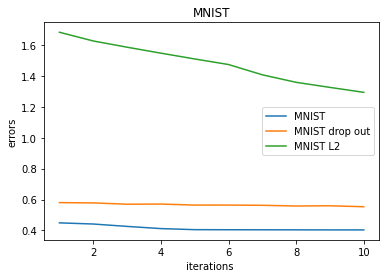

In [91]:
# Plot learning curve (with errors)
errors = np.squeeze(acce_mnist_train)
errors_rdp = np.squeeze(acce_mnist_train_rdp)
errors_rl = np.squeeze(acce_mnist_train_rl)
plt.plot(iterations,errors,label ='MNIST')
plt.plot(iterations,errors_rdp,label ='MNIST drop out')
plt.plot(iterations,errors_rl,label ='MNIST L2')
plt.ylabel('errors')
plt.xlabel('iterations ')
plt.title("MNIST")
plt.legend()
plt.show()

##Plotting for fashion MNIST for 3 models

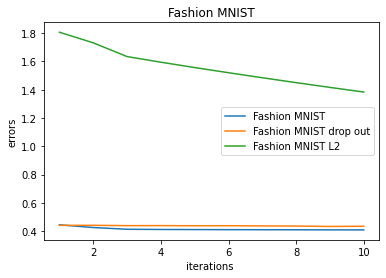

In [92]:
# Plot learning curve (with errors)
errors = np.squeeze(acce_fmnist_train)
errors_rdp = np.squeeze(acce_fmnist_train_rdp)
errors_rl = np.squeeze(acce_fmnist_train_rl)
plt.plot(iterations,errors,label='Fashion MNIST')
plt.plot(iterations,errors_rdp,label='Fashion MNIST drop out')
plt.plot(iterations,errors_rl,label='Fashion MNIST L2')
plt.ylabel('errors')
plt.xlabel('iterations ')
plt.title("Fashion MNIST")
plt.legend()
plt.show()

## One Step Inference
## Default Mode for MNIST

In [130]:
#Default mode
mlp_on_default = MLP(size_input, size_hidden, size_output)
#Default mode for L2 reguralization
mlp_on_default_l = MLP_RegL(size_input, size_hidden, size_output)
#Default mode for drop out
mlp_on_default_dp = MLP_Regdp(size_input, size_hidden, size_output)


In [131]:
train_ds_mnist = tf.data.Dataset.from_tensor_slices((X_train_mnist, y_train_mnist)).shuffle(25, seed=epoch*(seed)).batch(32)

In [132]:
test_loss_total = tf.Variable(0, dtype=tf.float32)
#test_loss_total = 0.0
accuracy=0
for inputs, outputs in train_ds_mnist:
  preds = mlp_on_default.forward(inputs)
  #b = mlp_on_default.loss(preds, outputs)
  test_loss_total = test_loss_total + mlp_on_default.loss(preds, outputs)
  accuracy=categorical_accuracy(preds, outputs)
# a = (test_loss_total.numpy() / X_train.shape[0])
# print(X_train.shape[0])
# print(test_loss_total.numpy())
# print(b)
print("For MNIST inference\n")
print('Test categorical_cross_entropy: {:.4f}- Accuracy:={}'.format(np.sum(test_loss_total.numpy()) / X_train_mnist.shape[0],(100-(np.abs(np.sum(np.abs(accuracy)))/accuracy.shape[0]))))

For MNIST inference

Test categorical_cross_entropy: 0.4542- Accuracy:=99.95833333333333


In [133]:
test_loss_total = tf.Variable(0, dtype=tf.float32)
#test_loss_total = 0.0
accuracy=0
for inputs, outputs in train_ds_mnist:
  preds = mlp_on_default_dp.forward(inputs)
  #b = mlp_on_default.loss(preds, outputs)
  test_loss_total = test_loss_total + mlp_on_default_dp.loss(preds, outputs)
  accuracy=categorical_accuracy(preds, outputs)
# a = (test_loss_total.numpy() / X_train.shape[0])
# print(X_train.shape[0])
# print(test_loss_total.numpy())
# print(b)
print("For MNIST inference\n")
print('Test categorical_cross_entropy: {:.4f}- Accuracy:={}'.format(np.sum(test_loss_total.numpy()) / X_train_mnist.shape[0],(100-(np.abs(np.sum(np.abs(accuracy)))/accuracy.shape[0]))))

For MNIST inference

Test categorical_cross_entropy: 0.4522- Accuracy:=99.875


In [134]:
test_loss_total = tf.Variable(0, dtype=tf.float32)
#test_loss_total = 0.0
accuracy=0
for inputs, outputs in train_ds_mnist:
  preds = mlp_on_default_l.forward(inputs)
  #b = mlp_on_default.loss(preds, outputs)
  test_loss_total = test_loss_total + mlp_on_default_l.loss(preds, outputs)
  accuracy=categorical_accuracy(preds, outputs)
# a = (test_loss_total.numpy() / X_train.shape[0])
# print(X_train.shape[0])
# print(test_loss_total.numpy())
# print(b)
print("For MNIST inference\n")
print('Test categorical_cross_entropy: {:.4f}- Accuracy:={}'.format(np.sum(test_loss_total.numpy()) / X_train_mnist.shape[0],(100-(np.abs(np.sum(np.abs(accuracy)))/accuracy.shape[0]))))

For MNIST inference

Test categorical_cross_entropy: 1.8758- Accuracy:=99.95833333333333


## Default Mode for Fashion MNIST

In [135]:
#Default mode
mlp_on_default = MLP(size_input, size_hidden, size_output)

#Default mode for drop out
mlp_on_default_dp = MLP_Regdp(size_input, size_hidden, size_output)

#Default mode for L2 reguralization
mlp_on_default_l = MLP_RegL(size_input, size_hidden, size_output)

In [136]:
train_ds_fmnist = tf.data.Dataset.from_tensor_slices((X_train_fmnist, y_train_fmnist)).shuffle(25, seed=epoch*(seed)).batch(32)

In [137]:
test_loss_total = tf.Variable(0, dtype=tf.float32)
#test_loss_total = 0.0
accuracy=0
for inputs, outputs in train_ds_fmnist:
  preds = mlp_on_default.forward(inputs)
  #b = mlp_on_default.loss(preds, outputs)
  test_loss_total = test_loss_total + mlp_on_default.loss(preds, outputs)
  accuracy=categorical_accuracy(preds, outputs)
# a = (test_loss_total.numpy() / X_train.shape[0])
# print(X_train.shape[0])
# print(test_loss_total.numpy())
# print(b)
print("For Fashion MNIST inference\n")
print('Test categorical_cross_entropy: {:.4f}- Accuracy:={}'.format(np.sum(test_loss_total.numpy()) / X_train_fmnist.shape[0],(100-(np.abs(np.sum(np.abs(accuracy)))/accuracy.shape[0]))))

For Fashion MNIST inference

Test categorical_cross_entropy: 0.4545- Accuracy:=99.875


In [138]:
test_loss_total = tf.Variable(0, dtype=tf.float32)
#test_loss_total = 0.0
accuracy=0
for inputs, outputs in train_ds_fmnist:
  preds = mlp_on_default_dp.forward(inputs)
  #b = mlp_on_default.loss(preds, outputs)
  test_loss_total = test_loss_total + mlp_on_default_dp.loss(preds, outputs)
  accuracy=categorical_accuracy(preds, outputs)
# a = (test_loss_total.numpy() / X_train.shape[0])
# print(X_train.shape[0])
# print(test_loss_total.numpy())
# print(b)
print("For Fashion MNIST inference\n")
print('Test categorical_cross_entropy: {:.4f}- Accuracy:={}'.format(np.sum(test_loss_total.numpy()) / X_train_fmnist.shape[0],(100-(np.abs(np.sum(np.abs(accuracy)))/accuracy.shape[0]))))

For Fashion MNIST inference

Test categorical_cross_entropy: 0.4254- Accuracy:=99.95833333333333


In [139]:
test_loss_total = tf.Variable(0, dtype=tf.float32)
#test_loss_total = 0.0
accuracy=0
for inputs, outputs in train_ds_fmnist:
  preds = mlp_on_default_l.forward(inputs)
  #b = mlp_on_default.loss(preds, outputs)
  test_loss_total = test_loss_total + mlp_on_default_l.loss(preds, outputs)
  accuracy=categorical_accuracy(preds, outputs)
# a = (test_loss_total.numpy() / X_train.shape[0])
# print(X_train.shape[0])
# print(test_loss_total.numpy())
# print(b)
print("For Fashion MNIST inference\n")
print('Test categorical_cross_entropy: {:.4f}- Accuracy:={}'.format(np.sum(test_loss_total.numpy()) / X_train_fmnist.shape[0],(100-(np.abs(np.sum(np.abs(accuracy)))/accuracy.shape[0]))))

For Fashion MNIST inference

Test categorical_cross_entropy: 1.8102- Accuracy:=99.95833333333333
